# **Download Dataset**



In [1]:
!gdown --id 1KEodpUajHvACGXubdOANFyQH8lqNjxOR

Downloading...
From: https://drive.google.com/uc?id=1KEodpUajHvACGXubdOANFyQH8lqNjxOR
To: /content/Data_Negara_HELP.csv
100% 9.25k/9.25k [00:00<00:00, 15.0MB/s]


# **Import Library**

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# **Reading and Understanding Data**

In [4]:
# membaca dataset dan menampilkan 5 data pertama
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# mengecek ukuran baris dan kolom
df.shape

(167, 10)

In [6]:
# mengecek nama-nama kolom, tipe data masing-masing kolom, beserta kelengkapan datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# melihat summary statistik dari dataframe
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# **Exploratory Data Analysis**

In [8]:
# memastikan jumlah missing value pada masing-masing kolom
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Karena tidak ditemukan nilai null di setiap kolom, maka tidak perlu dilakukan handling missing values.

In [9]:
# rename beberapa nama kolom
df = df.rename(columns={'Kematian_anak' : 'Kematian Anak', 'Harapan_hidup' : 'Harapan Hidup', 
                        'Jumlah_fertiliti' : 'Jumlah Fertiliti','GDPperkapita' : 'GDPP'})

**Univariate Analysis**

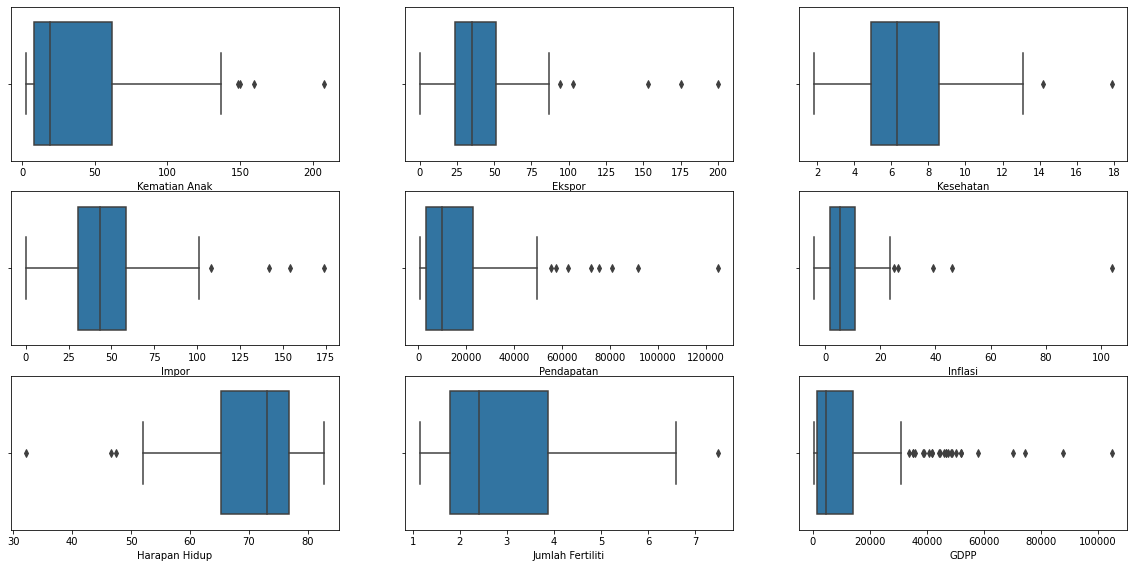

In [10]:
# menampilkan boxplot semua kolom untuk melihat terdapat outliers atau tidak
plt.figure(figsize=(20, 30))
for i in range(1, len(df.columns)):
  plt.subplot(9, 3, i)
  sns.boxplot(df.columns[i], data=df)

Hasil boxplot menunjukkan bahwa semua kolom pada dataframe memiliki pencilan terutama pada kolom pendapatan, inflasi, dan GDPP. Oleh karena itu, perlu dilakukan handling outliers kedepannya. 

**Bivariate Analysis**

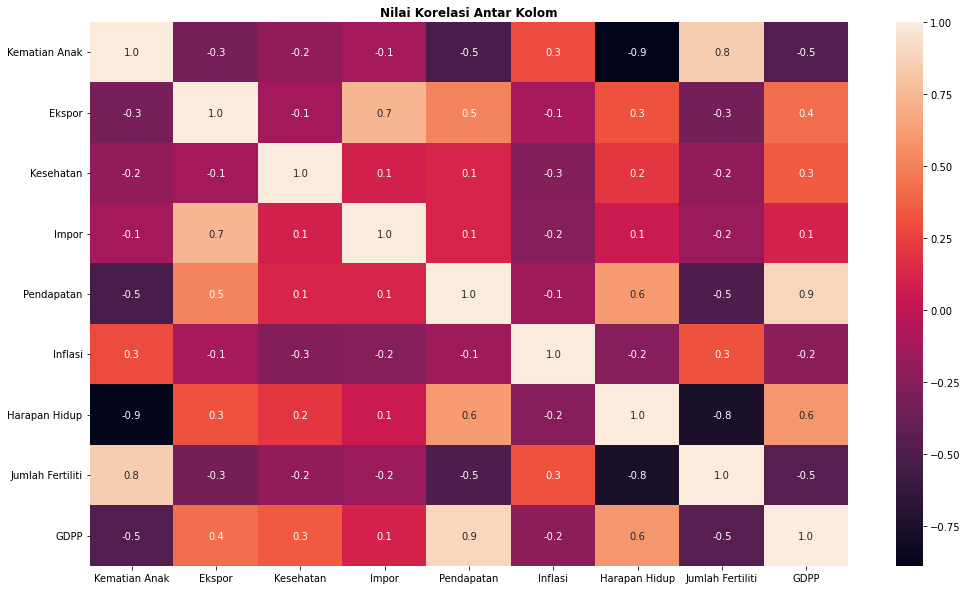

In [11]:
# menampilkan heatmap untuk melihat bagaimana nilai korelasi antar kolom
fig,ax = plt.subplots()
fig.set_size_inches(17,10)
num_cols = [i for i in range(1,len(df.columns))] # mengambil kolom yang berisi data numerik saja
sns.heatmap(data = df.iloc[:,num_cols].corr(), annot = True, fmt='.1f').set_title('Nilai Korelasi Antar Kolom', weight = 'bold')
plt.show()

Heat map dapat membantu kita untuk mengetahui hubungan apa yang dimiliki oleh masing-masing kolom. Hasil menunjukkan bahwa, banyak nilai korelasi pada kolom-kolom yang  mengindikasikan adanya hubungan yang kuat, baik secara positif maupun negatif. Contohnya korelasi antara kematian anak dan harapan hidup yang memiliki hubungan kuat negatif. Selain itu ada juga kolom GDPP dengan pendapatan memiliki hubungan yang kuat positif. Dengan mengetahui nilai korelasi dapat membantu kita dalam membuat scatter plot nantinya. 

**Multivariate Analysis**

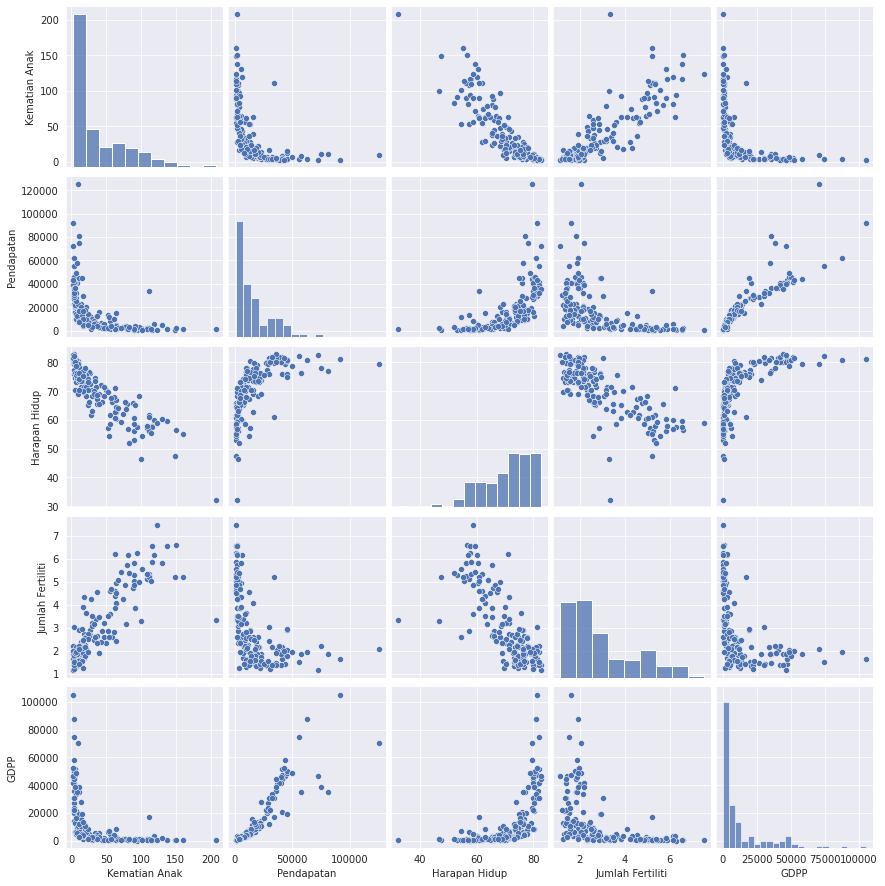

In [12]:
# menampilkan pairplot dari kolom yang memiliki nilai korelasi kuat positif dan kuat negatif
sns.set({'figure.figsize':(12,8)})
sns.pairplot(df, vars=['Kematian Anak', 'Pendapatan', 'Harapan Hidup', 'Jumlah Fertiliti', 'GDPP'])
plt.show()

Berdasarkan heat map yang telah dibuat, sekarang saya mencoba menampilkan pair plot untuk kolom-kolom yang memiliki hubungan kuat baik secara positif maupun negatif. Pair plot ini sangat berguna untuk memvisualisasikan bagaimana hubungan masing-masing kolom sekaligus sehingga dapat meringkas waktu. Beberapa insight yang bisa didapatkan dari pair plot ini adalah :
1.   Kolom kematian anak dan harapan hidup berbanding terbalik karena scatter plot bergerak ke kanan bawah. Nilai korelasi pada heat map juga menunjukkan nilai -0.9, dimana artinya berkorelasi kuat negatif.  
2.   GDPP dan pendapatan berbanding lurus karena scatter plot bergerak ke kanan atas. Nilai korelasi pada heat map juga menunjukkan nilai 0.9, dimana artinya berkorelasi kuat positif.  



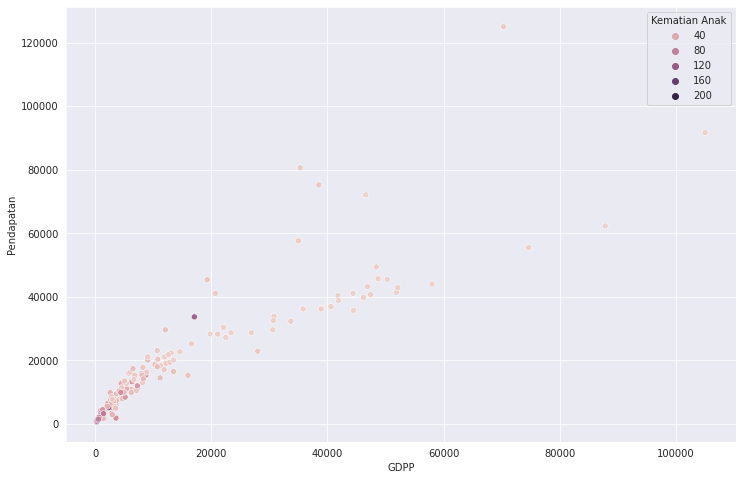

In [13]:
# memvisualisasikan dengan scatter plot bagaimana hubungan pendapatan dan GDPP dengan kematian anak
sns.scatterplot('GDPP', 'Pendapatan', hue='Kematian Anak', data=df)
plt.show()

Setelah mengetahui bahwa GDPP berbanding lurus dengan pendapatan, selanjutnya saya mencoba untuk melihat bagaimana hubungan kedua kolom tersebut dengan jumlah kematian anak. Berdasarkan scatter plot di atas, dapat dilihat bahwa semakin besarnya pendapatan dan gdpp maka akan diikuti oleh sedikitnya jumlah kematian anak di suatu negara. Namun, tidak menutup kemungkinan jika jumlah kematian anak berbanding lurus dengan GDPP dan pendapatan. Karena, banyak faktor yang dapat mempengaruhi jumlah kematian anak misalnya faktor kesehatan, jumlah fertiliti, dan lain-lain.

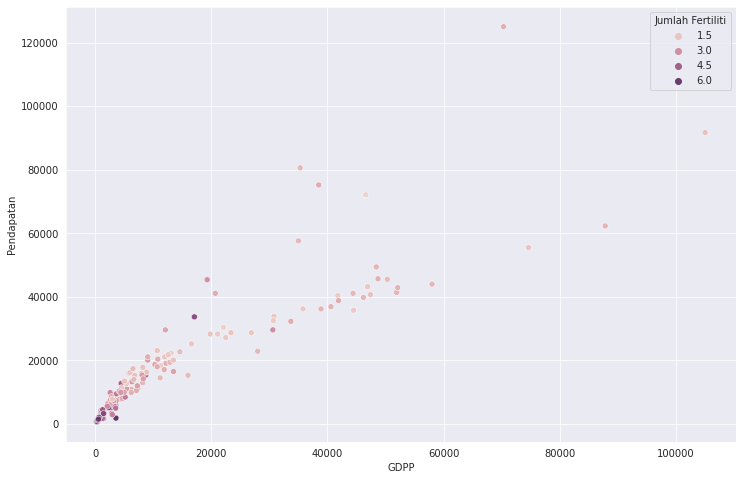

In [14]:
# memvisualisasikan dengan scatter plot bagaimana hubungan pendapatan dan GDPP dengan jumlah fertiliti
sns.scatterplot('GDPP', 'Pendapatan', hue='Jumlah Fertiliti', data=df)
plt.show()

Sama seperti jumlah kematian anak, hubungan antara gdpp dan pendapatan dengan jumlah fertiliti ialah semakin besarnya pendapatan dan gdpp maka akan diikuti oleh sedikitnya jumlah fertiliti di suatu negara. Namun, tidak menutup kemungkinan jika jumlah fertiliti berbanding lurus dengan GDPP dan pendapatan. Karena, banyak faktor yang dapat mempengaruhi jumlah fertiliti misalnya faktor kesehatan, kematian anak, dan lain-lain.

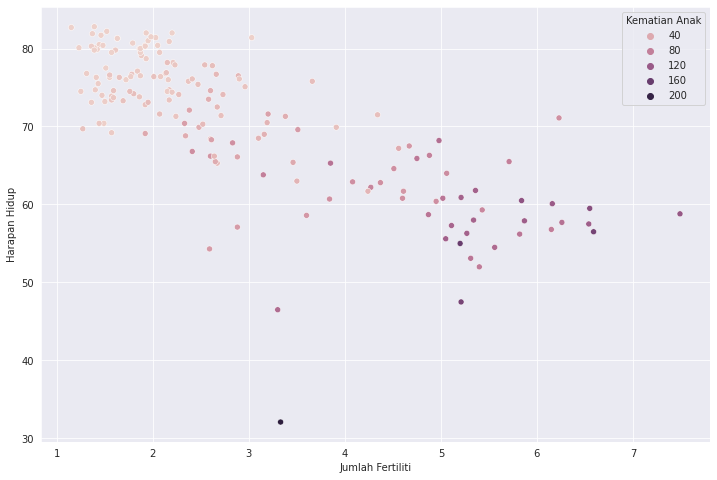

In [15]:
# memvisualisasikan dengan scatter plot bagaimana hubungan jumlah fertiliti dan harapan hidup dengan kematian anak
sns.scatterplot('Jumlah Fertiliti', 'Harapan Hidup', hue='Kematian Anak', data=df)
plt.show()

Setelah mengetahui bahwa harapan hidup berbanding terbalik dengan jumlah fertiliti, selanjutnya saya mencoba untuk melihat bagaimana hubungan kedua kolom tersebut dengan jumlah kematian anak. Berdasarkan scatter plot di atas, dapat dilihat bahwa, jika jumlah fertiliti semakin besar dan harapan hidup semakin kecil maka akan diikuti oleh besarnya jumlah kematian anak di suatu negara.

# **Handling Outliers**

Hasil univariate analisis yang telah dilakukan menunjukkan bahwa semua kolom memiliki nilai pencilan. Maka, pencilan tersebut harus dihandle agar tidak menimbulkan distorsi data. Agar tidak kehilangan informasi, saya tidak melakukan remove pada outliernya. Saya menghandle outliers dengan mereplace nilai pencilan menjadi lower bound atau upper boundnya. 

In [16]:
# memilih kolom dengan data numerik saja
cols = (df.iloc[:,[1,2,3,4,5,6,7,8,9]]) 

def capping_outliers(df):
  df_cap = df.copy()
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - IQR*1.5
  upper_bound = Q3 + IQR*1.5
  
  for i in cols:
    for j in range(len(df[i])):
      if df[i][j] < lower_bound[i]:
        df[i][j] = lower_bound[i]
      if df[i][j] > upper_bound[i]:
        df[i][j] = upper_bound[i]

  for i in cols:
    df_cap[i] = df[i]

  return df_cap

Function capping_outliers pertama-tama akan mencari nilai lower bound dan upper bound. Kemudian akan membandingkan apakah nilai df[i][j] < lower bound atau df[i][j] > upper bound. Step yang terakhir ialah mengembalikan dataframe dimana seluruh pencilannya telah direplace dengan nilai lower bound atau upper boundnya.

In [17]:
# mengimplementasikan function capping outliers pada dataset
df2 = capping_outliers(df)
df2

,Negara,Kematian Anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan Hidup,Jumlah Fertiliti,GDPP
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,24.16,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


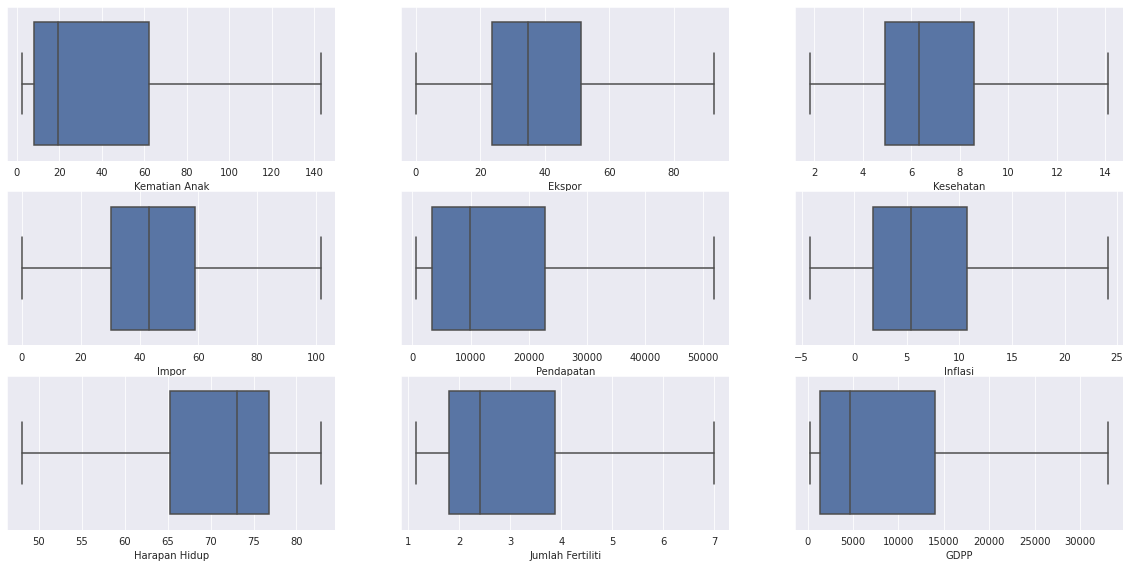

In [18]:
# membuat boxplot untuk masing-masing kolom setelah handling outliers
plt.figure(figsize=(20, 30))
for i in range(1, len(df2.columns)):
  plt.subplot(9, 3, i)
  sns.boxplot(df2.columns[i], data=df2)

Dari hasil boxplot di atas dapat dilihat bahwa pencilan sudah tidak ada lagi dan dataset siap diolah ke step selanjutnya. 

# **Scaling Data**

In [19]:
columns = (df2.iloc[:,[1,5,6,7,8,9]])
columns.head()

,Kematian Anak,Pendapatan,Inflasi,Harapan Hidup,Jumlah Fertiliti,GDPP
0,90.2,1610,9.44,56.2,5.82,553
1,16.6,9930,4.49,76.3,1.65,4090
2,27.3,12900,16.10,76.5,2.89,4460
3,119.0,5900,22.40,60.1,6.16,3530
4,10.3,19100,1.44,76.8,2.13,12200


Mengambil beberapa kolom saja yaitu Kematian Anak, Pendapatan, Inflasi, Harapan Hidup, Jumlah Fertiliti, GDPP dengan pertimbangan hubungan masing-masing kolom yang sebagian besar berkorelasi kuat positif atau kuat negatif setelah melihat hasil korelasi pada heat map dan scatter plot.

In [20]:
sc = StandardScaler()
df_scale = sc.fit_transform(columns)
df_scale = pd.DataFrame(df_scale, columns = ['Kematian Anak', 'Pendapatan', 'Inflasi', 'Harapan Hidup', 'Jumlah Fertiliti', 'GDPP'])
df_scale.head()

,Kematian Anak,Pendapatan,Inflasi,Harapan Hidup,Jumlah Fertiliti,GDPP
0,1.369802,-0.943938,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.199290,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.660985,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.209639,-0.841463,0.722166,-0.543003,0.159686


Dengan bantuan library sklearn dan menggunakan StandardScaler(), selanjutnya saya melakukan standarisasi pada kolom-kolom yang telah dipilih agar range nilai antar satu kolom dan kolom lainnya tidak terlalu abstrak. Setelah berhasil di scaling, selanjutnya dataset siap untuk dilakukan clustering menggunakan K-Means.

# **Clustering Using K-Means**

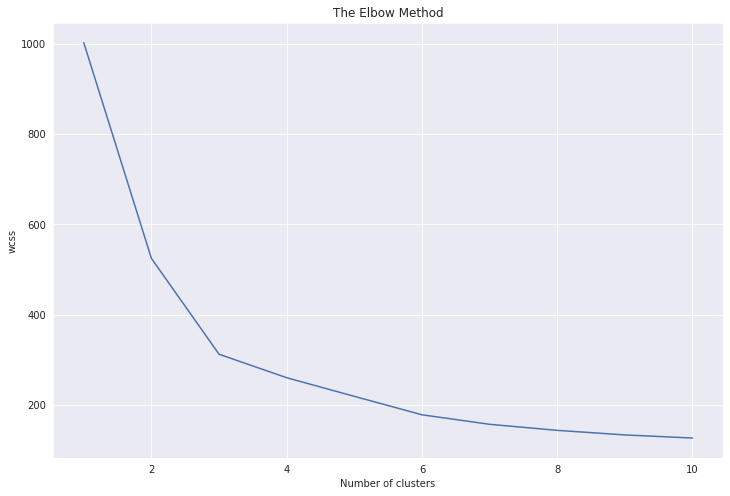

In [21]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_scale)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

plt.show()

Sebelum dilakukan clustering, saya menggunakan elbow method untuk menentukan jumlah n_clustering agar lebih optimal. Berdasarkan rekomendasi hasil elbow method di atas, saya memilih untuk menggunakan nilai n_cluster = 3

In [22]:
kmeans1 = KMeans(n_clusters = 3, random_state=42).fit(df_scale)
labels1 = kmeans1.labels_
new_df = pd.DataFrame(data = df_scale)
new_df['label1_kmeans'] = labels1
new_df.head()

,Kematian Anak,Pendapatan,Inflasi,Harapan Hidup,Jumlah Fertiliti,GDPP,label1_kmeans
0,1.369802,-0.943938,0.355270,-1.702225,1.915276,-0.846341,1
1,-0.550464,-0.395181,-0.385208,0.663321,-0.862779,-0.540827,2
2,-0.271295,-0.199290,1.351551,0.686859,-0.036691,-0.508868,2
3,2.121210,-0.660985,2.293979,-1.243238,2.141784,-0.589198,1
4,-0.714835,0.209639,-0.841463,0.722166,-0.543003,0.159686,2


Dengan jumlah n_cluster = 3, maka akan membagi label1_kmeans menjadi nilai 0, 1, 2 yang masing-masing mewakili wilayah cluster.

In [23]:
df3 = pd.DataFrame(new_df, columns=['Pendapatan', 'Kematian Anak', 'label1_kmeans'])
df3.head()

,Pendapatan,Kematian Anak,label1_kmeans
0,-0.943938,1.369802,1
1,-0.395181,-0.550464,2
2,-0.199290,-0.271295,2
3,-0.660985,2.121210,1
4,0.209639,-0.714835,2


Disini saya mencoba mengambil 2 kolom yaitu Pendapatan dan Kematian Anak untuk melihat bagaimana persebaran clusternya.

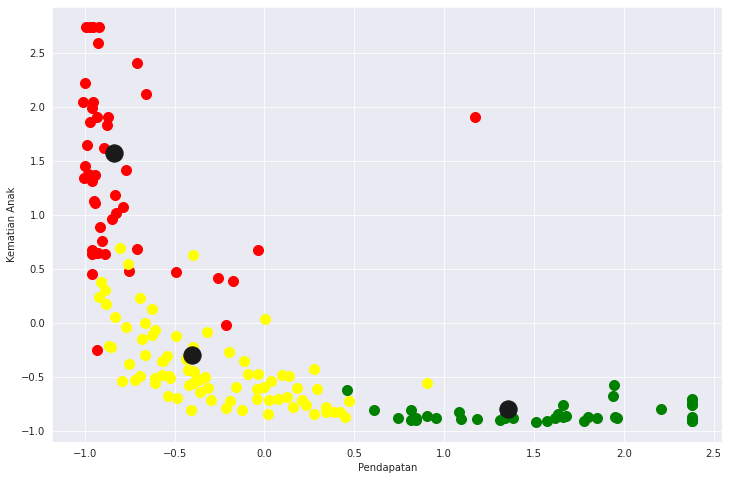

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(df3['Pendapatan'][df3.label1_kmeans == 0], df3['Kematian Anak'][df3.label1_kmeans == 0], c='green', s=100)
plt.scatter(df3['Pendapatan'][df3.label1_kmeans == 1], df3['Kematian Anak'][df3.label1_kmeans == 1], c='red', s=100)
plt.scatter(df3['Pendapatan'][df3.label1_kmeans == 2], df3['Kematian Anak'][df3.label1_kmeans == 2], c='yellow', s=100)

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Pendapatan')
plt.ylabel('Kematian Anak')
plt.show()

Berdasarkan hasil visualisasi scatter plot, diketahui bahwa wilayah hijau mewakili cluster 0, wilayah merah mewakili cluster 1, dan wilayah kuning mewakili cluster 2. Insight yang bisa diambil adalah, wilayah merah atau cluster 1 merupakan negara-negara yang paling membutuhkan bantuan apabila kita melihat faktor dari kolom pendapatan dan kematian anak. Karena itu merupakan wilayah dengan pendapatan yang kecil namun dengan jumlah kematian anak yang tinggi. 

In [25]:
df4 = pd.DataFrame(new_df, columns=['GDPP', 'Harapan Hidup', 'label1_kmeans'])
df4.head()

,GDPP,Harapan Hidup,label1_kmeans
0,-0.846341,-1.702225,1
1,-0.540827,0.663321,2
2,-0.508868,0.686859,2
3,-0.589198,-1.243238,1
4,0.159686,0.722166,2


Saya kembali mencoba mengambil 2 kolom yaitu GDPP dan Harapan Hidup untuk melihat bagaimana persebaran clusternya.

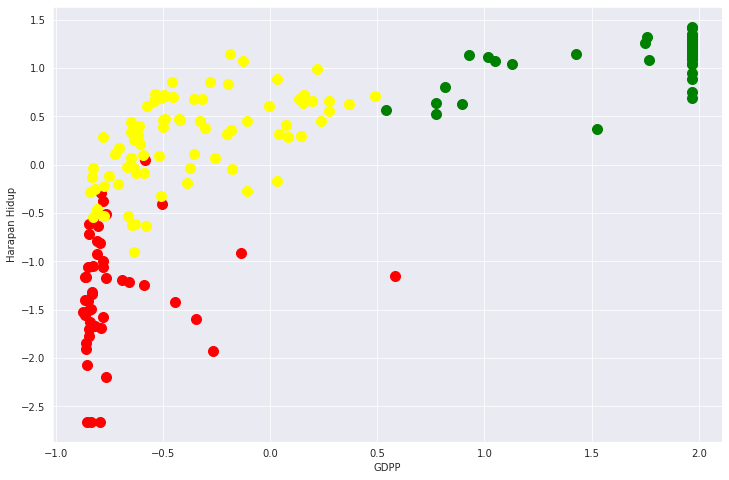

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(df4['GDPP'][df4.label1_kmeans == 0], df4['Harapan Hidup'][df4.label1_kmeans == 0], c='green', s=100)
plt.scatter(df4['GDPP'][df4.label1_kmeans == 1], df4['Harapan Hidup'][df4.label1_kmeans == 1], c='red', s=100)
plt.scatter(df4['GDPP'][df4.label1_kmeans == 2], df4['Harapan Hidup'][df4.label1_kmeans == 2], c='yellow', s=100)

plt.xlabel('GDPP')
plt.ylabel('Harapan Hidup')
plt.show()

Berdasarkan hasil visualisasi scatter plot, diketahui bahwa wilayah hijau mewakili cluster 0, wilayah merah mewakili cluster 1, dan wilayah kuning mewakili cluster 2. Insight yang bisa diambil adalah, wilayah merah atau cluster 1 merupakan negara-negara yang paling membutuhkan bantuan apabila kita melihat faktor dari kolom GDPP dan harapan hidup. Karena itu merupakan wilayah dengan GDPP yang kecil dan tingkat harapan hidup yang rendah pula.

In [27]:
# mengecek nilai silhouette_score 
print(silhouette_score(df3, labels=labels1))
print(silhouette_score(df4, labels=labels1))

0.6455228772119566
0.6550748134764339


Hasil silhoutte score menunjukkan bahwa modelling yang dibuat sudah cukup baik dalam mengcluster.

# **Evaluation**

In [28]:
# merge df2 (dataset yang telah dilakukan handling outlier) dengan new_df (dataset yang telah dilakukan standarisasi)
df_merge = pd.merge(df2, new_df, left_index=True, right_index=True)

# drop beberapa kolom yang tidak diperlukan lagi
df_final = df_merge.drop(['Ekspor', 'Kesehatan', 'Impor', 'Kematian Anak_y',	
                          'Pendapatan_y', 'Inflasi_y',	'Harapan Hidup_y', 'Jumlah Fertiliti_y',	'GDPP_y'],axis=1)

# rename beberapa nama kolom agar lebih mudah dibaca 
df_final = df_final.rename(columns={'Kematian Anak_x' : 'Kematian Anak', 'Pendapatan_x' : 'Pendapatan', 'Inflasi_x' : 'Inflasi',
                                    'Harapan Hidup_x' : 'Harapan Hidup', 'Jumlah Fertiliti_x' : 'Jumlah Fertiliti',
                                    'GDPP_x' : 'GDPP', 'label1_kmeans' : 'ID Cluster'})

# menampilkan dataset final
df_final.head()

,Negara,Kematian Anak,Pendapatan,Inflasi,Harapan Hidup,Jumlah Fertiliti,GDPP,ID Cluster
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,2


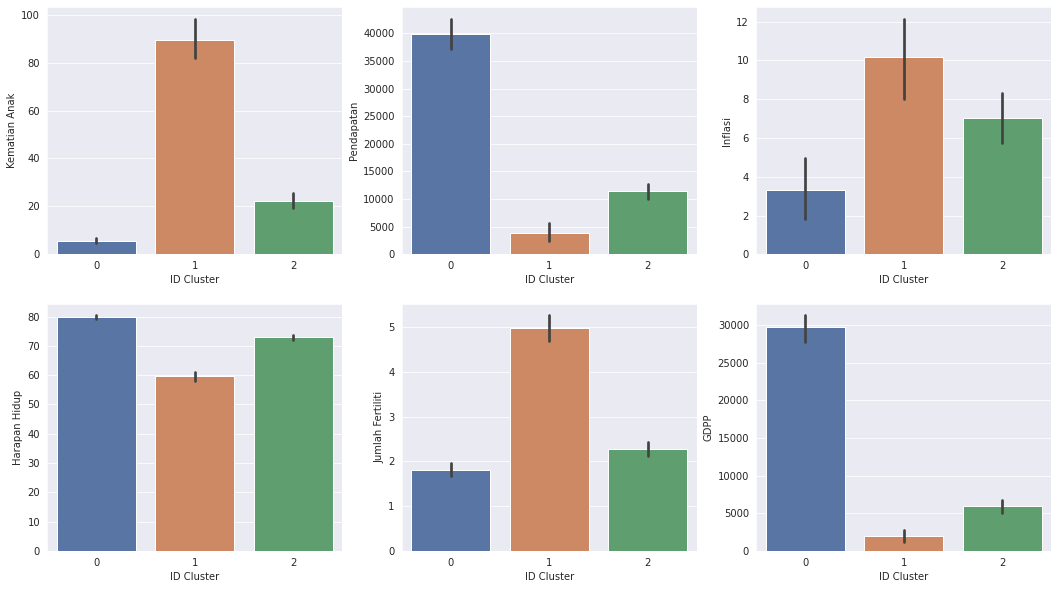

In [29]:
# menampilkan barplot untuk melihat jumlah nilai masing-masing kolom berdasarkan ID Cluster
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.barplot(ax=axes[0, 0], data=df_final, x='ID Cluster', y='Kematian Anak')
sns.barplot(ax=axes[0, 1], data=df_final, x='ID Cluster', y='Pendapatan')
sns.barplot(ax=axes[0, 2], data=df_final, x='ID Cluster', y='Inflasi')
sns.barplot(ax=axes[1, 0], data=df_final, x='ID Cluster', y='Harapan Hidup')
sns.barplot(ax=axes[1, 1], data=df_final, x='ID Cluster', y='Jumlah Fertiliti')
sns.barplot(ax=axes[1, 2], data=df_final, x='ID Cluster', y='GDPP')
plt.show()

Indikator yang dapat digunakan untuk menentukan negara-negara mana saja yang berhak didahulukan untuk menerima bantuan adalah :
1.   Negara dengan kematian anak yang tinggi
2.   Negara dengan pendapatan per orang yang rendah
3.   Negara dengan inflasi yang tinggi
4.   Negara dengan harapan hidup yang rendah
5.   Negara dengan jumlah fertiliti yang tinggi
6.   Negara dengan nilai GDPP yang kecil

Berdasarkan klasifikasi tersebut, wilayah dengan ID Cluster = 1 lah yang memenuhi seluruh kriteria di atas.  



# **10 Rekomendasi Negara yang Paling Membutuhkan Bantuan**

Karena HELP International merupakan organisasi dengan basic yang ingin memerangi kemiskinan, maka akan dilakukan filtering negara-negara dengan GDPP paling kecil. Kemudian, diikuti oleh pendapatan yang merupakan kolom dengan hubungan yang paling kuat secara positif dengan GDPP. Dan dilanjutkan dengan kolom harapan hidup, kematian anak, jumlah fertiliti, dan inflasi.

In [30]:
# filter nama-nama negara dengan ID Cluster == 1
country_cluster1 = df_final[df_final['ID Cluster'] == 1]

# melakukan sorting dengan kolom pertama yang dipakai ialah GDPP, kemudian diikuti dengan kolom yang memiliki hubungan paling kuat dengan GDPP
result = country_cluster1.sort_values(['GDPP','Pendapatan','Harapan Hidup','Kematian Anak','Jumlah Fertiliti', 'Inflasi'], 
                             ascending=[True, True, True, False, False, False])

# menampilkan 10 data pertama hasil sorting
result.head(10)

,Negara,Kematian Anak,Pendapatan,Inflasi,Harapan Hidup,Jumlah Fertiliti,GDPP,ID Cluster
26,Burundi,93.600,764,12.30,57.70,6.2600,231,1
88,Liberia,89.300,700,5.47,60.80,5.0200,327,1
37,"Congo, Dem. Rep.",116.000,609,20.80,57.50,6.5400,334,1
112,Niger,123.000,814,2.55,58.80,7.0075,348,1
132,Sierra Leone,142.875,1220,17.20,55.00,5.2000,399,1
93,Madagascar,62.200,1390,8.79,60.80,4.6000,413,1
106,Mozambique,101.000,918,7.64,54.50,5.5600,419,1
31,Central African Republic,142.875,888,2.01,48.05,5.2100,446,1
94,Malawi,90.500,1030,12.10,53.10,5.3100,459,1
50,Eritrea,55.200,1420,11.60,61.70,4.6100,482,1


Berdasarkan result di atas, maka 10 rekomendasi negara yang berhak didahulukan untuk menerima bantuan ialah :
*   Burundi
*   Liberia
*   Congo, Dem. Rep.
*   Niger
*   Sierra Leone
*   Madagascar
*   Mozambique
*   Central African Republic
*   Malawi
*   Eritrea
